# Import Libraries

**Importing the usual libraries for pandas and plotting.**

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Using pandas to read loan_data.csv as a dataframe called loans.**

In [50]:
# Using cleaned tidy data.
loans=pd.read_csv('loan_data.csv')

** Checking out the info(), head(), and describe() methods on loans.**

In [51]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [52]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [53]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Using seaborn and pandas built-in plotting capabilities to create visualisation to understand the data. 

** Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

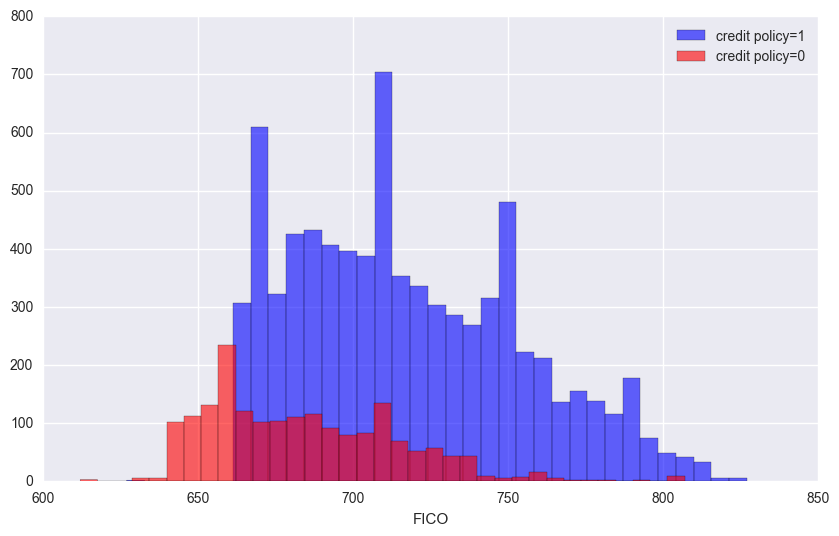

In [54]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=35, color='blue',alpha=0.6,label='credit policy=1')
loans[loans['credit.policy']==0]['fico'].hist(bins=35,  color='red',alpha=0.6, label='credit policy=0')
plt.legend()
plt.xlabel('FICO')

** Creating a histogram of two FICO distributions on top of each other, one for each not.fully.paid.**

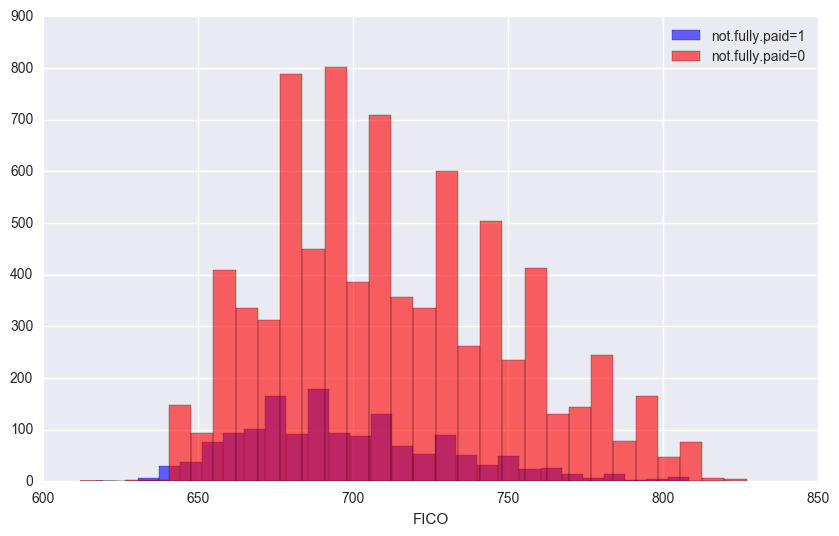

In [55]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=30,color='blue',alpha=0.6,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(bins=30,color='red',alpha=0.6,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

** Creating a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

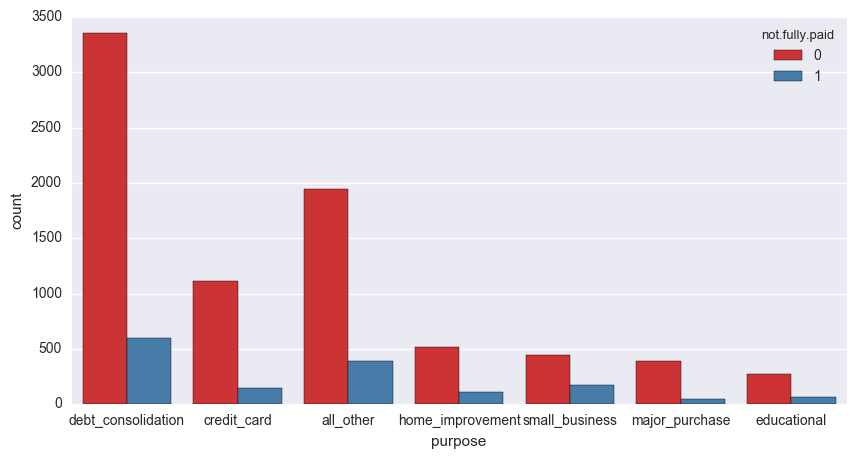

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(x='purpose',data=loans,hue='not.fully.paid',palette='Set1')

** Let's see the trend between FICO score and interest rate. **

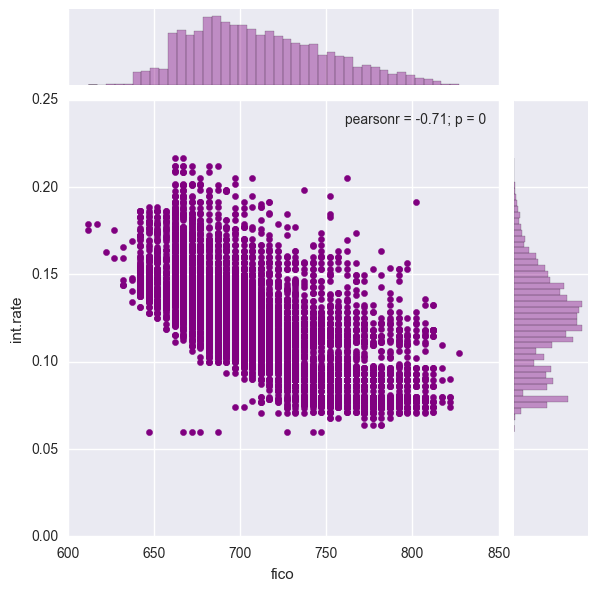

In [12]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple' )

** Creating plots to see if the trend differed between not.fully.paid and credit.policy.**

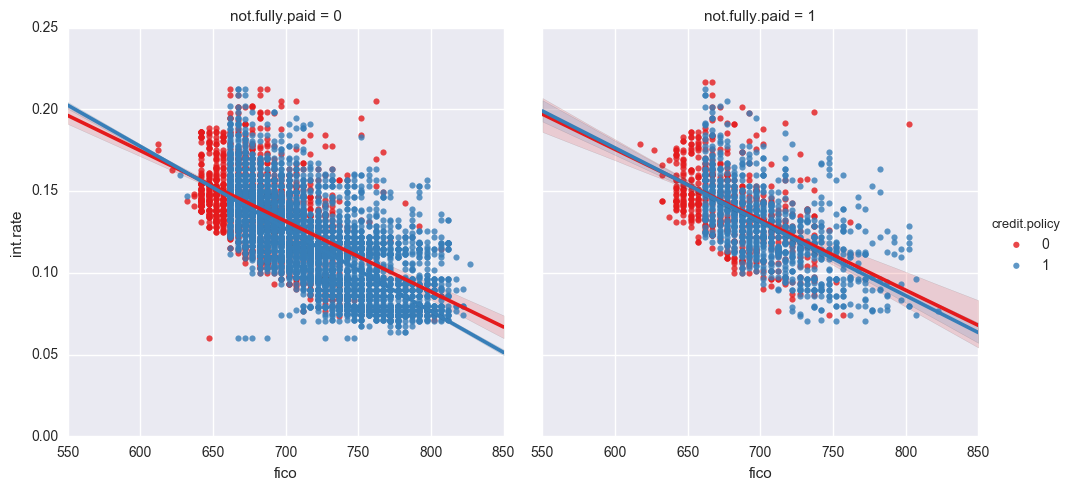

In [47]:
sns.lmplot(data=loans,x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid',palette="Set1")

# Setting up the Data

Setup our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [17]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

In [19]:
cat_feats=['purpose']


In [20]:
final_data= pd.get_dummies(loans,columns=cat_feats,drop_first=True)  

In [21]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now splitting  data into a training set and a testing set!

We are keeping 30 % data as testing data and 70 % data to train the model.


In [22]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

In [23]:
from sklearn.cross_validation import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Decision Tree Model


** Import DecisionTreeClassifier**

In [32]:
from sklearn.tree import DecisionTreeClassifier

**Creating an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [33]:
dtree=DecisionTreeClassifier()

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree
**Creating predictions from the test set and create a classification report and a confusion matrix.**

In [35]:
pred=dtree.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print('Classification Report : \n',classification_report(y_test,pred))
print('\n')
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))

Classification Report : 
              precision    recall  f1-score   support

          0       0.85      0.82      0.84      2431
          1       0.19      0.23      0.21       443

avg / total       0.75      0.73      0.74      2874



Confusion Matrix: 
 [[2002  429]
 [ 341  102]]


## Training the Random Forest model


**Creating an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc= RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predicting the class of not.fully.paid for the X_test data.**

In [40]:
prediction= rfc.predict(X_test)

**Now create a classification report from the results.**

In [58]:
print('Classification Report')
print(classification_report(y_test,prediction))


Classification Report
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.56      0.02      0.04       443

avg / total       0.80      0.85      0.78      2874



**Printing the Confusion Matrix for the predictions.**

In [59]:
print('Confusion matrix:')
print(confusion_matrix(y_test,prediction))

Confusion matrix:
[[2423    8]
 [ 433   10]]


**Conclusion:**

I have trained both decision tree and random forest model and found that the accuracy of Random Forest model was better than 75% accuracy of decision tree model.

Also, Random forest model have far less number of type 1 and type 2 error as compared to decision tree.